In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from typing import List, Set, Dict, Tuple
from scipy.spatial import ConvexHull

In [3]:
# Set is used as no duplicate points are used
result = set()

In [4]:
def line_distance(a: Tuple[int, int], b: Tuple[int, int], x: Tuple[int, int]) -> int:
    '''Returns the distance between point x and the line between points a and b'''
    return abs((x[1] - a[1]) * (b[0] - a[0]) - 
               (b[1] - a[1]) * (x[0] - a[0]))

In [5]:
def search_side(a: Tuple[int, int], b: Tuple[int, int], x: Tuple[int, int]) -> int:
    '''Find the side that of point x with respect to the line that joins a and b'''
    res = (x[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (x[0] - a[0])
    if res > 0:
        return 1
    if res < 0:
        return -1
    return 0

In [6]:
def quickhull(points: List[int], length: int, a: Tuple[int, int], b: Tuple[int, int], side: int) -> None:
    '''Computes the quickhull algorithm'''
    index = -1
    max_distance = 0
    
    # Finding the point with the maximum distance
    # From the line and on the specified side of the line
    for i in range(length):
        temp = line_distance(a, b, points[i])
        
        if (search_side(a, b, points[i]) == side) and (temp > max_distance):
            index = i
            max_distance = temp
    
    # If no point is found and the points to the convex hull
    if index == -1:
        result.add("/".join(map(str, a)))
        result.add("/".join(map(str, b)))
        return
    
    # Recursive part for the next points
    quickhull(points, length, points[index], a, -search_side(points[index], a, b))
    quickhull(points, length, points[index], b, -search_side(points[index], b, a))

In [7]:
def printhull(points: List[int], length: int) -> None:
    '''Takes the input points and length of the list'''
    if (length < 3):
        print("Convex hull is not possible with too little points")
        return        
        
        
    # Finding the point with the maximum and minimum value
    min_x = 0
    max_x = 0
    for i in range(1, length):
        if points[i][0] < points[min_x][0]:
            min_x = i
        if points[i][0] > points[max_x][0]:
            max_x = i
    
    # find points on one side of the line between min and max x value
    quickhull(points, length, points[min_x], points[max_x], 1)
    # find points on other side of the line between min and max x value
    quickhull(points, length, points[min_x], points[max_x], -1)
    
    print("Points in the Convex Hull:")
    convex_hull_list = []
    for element in result:
        x = element.split("/")
        convex_hull_list.append((int(x[0]), int(x[1])))
        print("(", x[0], ",", x[1], ") ", end = " ")
        
    #Initialise data with points from convex hull list
    xdata=[]
    ydata=[]
    for xval,yval in convex_hull_list:
        xdata.append(xval)
        ydata.append(yval)
        
    # Create figure
    fig = plt.figure()
    # Add margins to make points more clear
    plt.margins(x=0.2, y=0.2)

    # Generate graph with all points
    l, = plt.plot(points[:, 0], points[:, 1], '.', color='k', linestyle='')
    plt.title("Convex Hull Points")
        
    def update_line(i: int) -> matplotlib.figure.Figure:
        # Update graph with new point from convex hull
        l, = plt.plot(xdata[:i],ydata[:i], marker='o', color='g', linestyle='')
        return l
    
    # Add animation to the graph
    ani = matplotlib.animation.FuncAnimation(fig, update_line,
                frames=len(xdata)+1, interval=50, repeat=True)
    
    # Update the graph every second
    writergif = matplotlib.animation.PillowWriter(fps=1)
    ani.save('quickhull.gif',writer=writergif)
    plt.draw()

In [8]:
points = [[0, 5], [2, 1], [3, 2], [4, 4],
            [1, 0], [1, 6], [4, 1], [3, 3]];
# To allow easier splicing for generating graphs
points = np.asarray(points)

Points in the Convex Hull:
( 0 , 5 )  ( 4 , 4 )  ( 4 , 1 )  ( 1 , 6 )  ( 1 , 0 )  

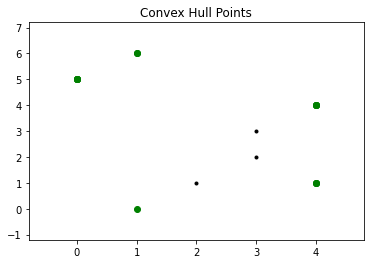

In [9]:
length = len(points)
printhull(points, length)

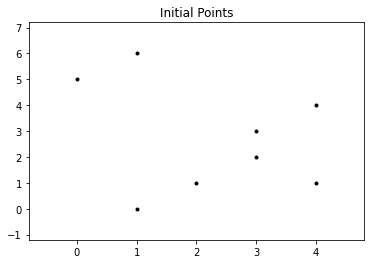

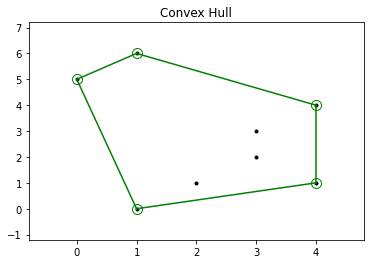

In [10]:
hull = ConvexHull(points)

for plot_id in (1, 2):
    fig, ax = plt.subplots(ncols=1)
    # Add margins to make points more clear
    ax.margins(0.2, 0.2)
    # Generate graph with all points
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if plot_id == 1:
        ax.set_title('Initial Points')
    else:
        ax.set_title('Convex Hull')
        for simplex in hull.simplices:
            # Plot lines between points of the convexhull
            ax.plot(points[simplex, 0], points[simplex, 1], 'green')
        # Highlight points that are part of the convex hull
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='green',
                color='none', lw=1, markersize=10)
    plt.show()